In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Pitch, Yaw, Roll误差

5.852370275671624
4.860006863731332
5.684002239029345


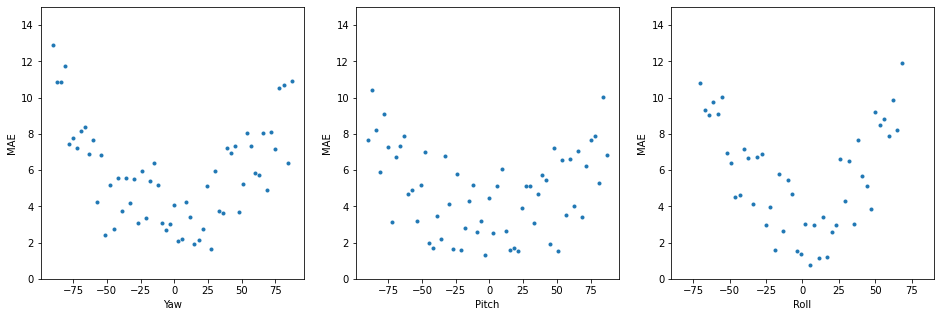

In [2]:
x = np.arange(-90, 90, 3)
plt.figure(figsize=(16, 5))

plt.subplot(1, 3, 1)
y = x * x / 1200
y = y + np.random.rand(60)*6 + np.random.rand(60)
print(y.mean())
plt.plot(x, y, '.')
plt.ylim(0, 15)
plt.xlabel("Yaw"); plt.ylabel("MAE")

plt.subplot(1, 3, 2)
y = x * x / 2000
y = y + np.random.rand(60)*6 + np.random.rand(60)
print(y.mean())
plt.plot(x, y, '.')
plt.ylim(0, 15)
plt.xlabel("Pitch"); plt.ylabel("MAE")

plt.subplot(1, 3, 3)
x = np.arange(-70, 70, 3)
y = x * x / 600
y = y + np.random.rand(47)*5 + np.random.rand(47)
print(y.mean())
plt.plot(x, y, '.')
plt.xlim(-90, 90)
plt.ylim(0, 15)
plt.xlabel("Roll"); plt.ylabel("MAE")

plt.show()

# 多摄像头姿态误差

0.18780897822282094
0.21500207128285598
0.22751227403089624


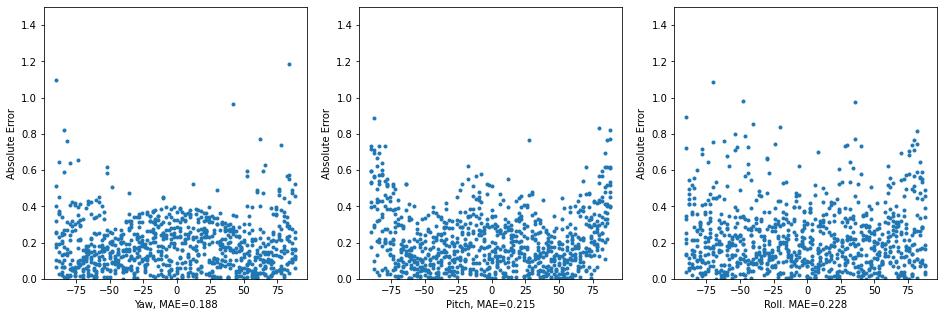

In [3]:
# x = np.array([0, 17, 31, 48, 63, 75]*10)
x = np.arange(-90, 90, 2)
x = np.repeat(x, 10)
plt.figure(figsize=(16, 5))

plt.subplot(1, 3, 1)
y = np.linspace(-1., 1., 90) / 1.5
y = abs(np.repeat(y*y, 10) + abs(np.random.randn(90*10)/3) - 0.4)
print(y.mean())
plt.plot(x, y, '.')
plt.ylim(0, 1.5)
plt.xlabel("Yaw, MAE=%.3f"%y.mean()); plt.ylabel("Absolute Error")


plt.subplot(1, 3, 2)
y = np.linspace(-1., 1., 90) / 0.9
y = abs(np.repeat(y*y, 10) + (np.random.randn(90*10)/3.2) - 0.4)/1.8
print(y.mean())
plt.plot(x, y, '.')
plt.ylim(0, 1.5)
plt.xlabel("Pitch, MAE=%.3f"%y.mean()); plt.ylabel("Absolute Error")


plt.subplot(1, 3, 3)
y = np.linspace(-1., 1., 90) / 2
y = abs(np.repeat(y*y, 10) + abs(np.random.randn(90*10)/3.2) + np.random.rand(90*10)/1.8-0.5)
print(y.mean())
plt.plot(x, y, '.')
plt.ylim(0, 1.5)
plt.xlabel("Roll. MAE=%.3f"%y.mean()); plt.ylabel("Absolute Error")

plt.show()

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)

# some random data
x = np.random.randn(1000)*40 + np.random.rand(1000)*100
# y = np.random.rand(1000)*10 + np.random.rand(1000)*10
y = np.ones(1000)

def scatter_hist(x, y, ax, ax_histx, ax_histy):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    ax.scatter(x, y)

    # now determine nice limits by hand:
    binwidth = 0.25
    xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    print(xymax)
    lim = (int(xymax/binwidth) + 1) * binwidth

    bins = np.arange(-lim, lim + binwidth, binwidth)
    ax_histx.hist(x, bins=bins)
    ax_histy.hist(y, bins=bins, orientation='horizontal')

190.80987822797218


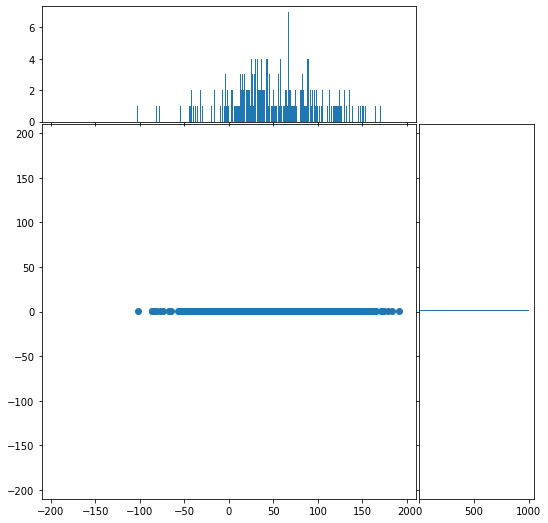

In [5]:
# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a square Figure
fig = plt.figure(figsize=(8, 8))

ax = fig.add_axes(rect_scatter)
ax_histx = fig.add_axes(rect_histx, sharex=ax)
ax_histy = fig.add_axes(rect_histy, sharey=ax)

# use the previously defined function
scatter_hist(x, y, ax, ax_histx, ax_histy)

plt.show()

# 视线估计

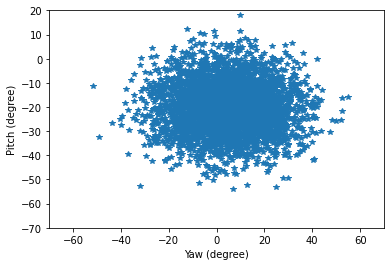

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.random.randn(4000)*15 + 5
y = np.random.randn(4000)*10 - 20

plt.plot(x, y, '*')
plt.ylim(-70, 20)
plt.xlim(-70, 70)
plt.xlabel("Yaw (degree)")
plt.ylabel("Pitch (degree)")

plt.show()

5.744751440283819
7.773556973242705


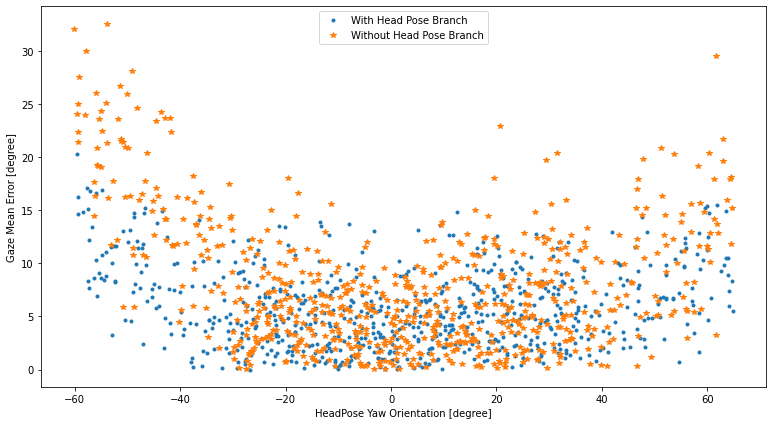

In [7]:
x1 = np.arange(-60, -30, 30/100) + np.random.randn(100) + 0
y1 = x1 * x1 / 250 + np.random.randn(100)*4

x2 = np.arange(-30, 35, 65/500) + np.random.randn(500) + 0
y2 = x2 * x2 / 1000 + np.random.randn(500)*4 + 4

x3 = np.arange(35, 65, 30/100) + np.random.randn(100) + 0
y3 = x3 * x3 / 300 + np.random.randn(100)*4 - 2

x = np.hstack((x1, x2, x3))
y = abs(np.hstack((y1, y2, y3)))

plt.figure(figsize=(13, 7))
plt.plot(x, y, '.', label='With Head Pose Branch')
print(y.mean())


x1 = np.arange(-60, -30, 30/100) + np.random.randn(100) + 0
y1 = x1 * x1 / 180 + np.random.randn(100)*5 + 5

x2 = np.arange(-30, 35, 65/500) + np.random.randn(500) + 0
y2 = x2 * x2 / 400 + np.random.randn(500)*5 + 4

x3 = np.arange(35, 65, 30/100) + np.random.randn(100) + 0
y3 = x3 * x3 / 200 + np.random.randn(100)*5 - 2

x = np.hstack((x1, x2, x3))
y = abs(np.hstack((y1, y2, y3)))

plt.plot(x, y, '*', label='Without Head Pose Branch')
print(y.mean())

plt.legend(loc='upper center')
plt.xlabel("HeadPose Yaw Orientation [degree]")
plt.ylabel("Gaze Mean Error [degree]")

plt.show()